In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os

plt.rcdefaults()
sns.set_style('whitegrid')

In [3]:
path = 'C:/Users/guill/Documents/Compu/Tesina/RESULTADOS/GSRD/slabmotion/slabmotions15/var_out/'
#path = 'C:/Users/guill/Documents/Compu/Tesina/RESULTADOS/GSRD/slabmotion/NN10cont/var_out/'
#variacion_xyz.out
# !head $path'50/variacion_Ec.out'

In [4]:
Temperaturas = ['50', '300', '550', '750']
datos = {}

for Temp in Temperaturas:
    datos[Temp] = []
    datos[Temp].append(pd.read_csv(path+Temp+'/variacion_Ec.out', delim_whitespace=True))
    datos[Temp].append(pd.read_csv(path+Temp+'/variacion_xyz.out', delim_whitespace=True))
    datos[Temp][1].columns = ['x',	'dx',	'y',	'dy',	'z',	'dz','layer']

### Energia y Temp

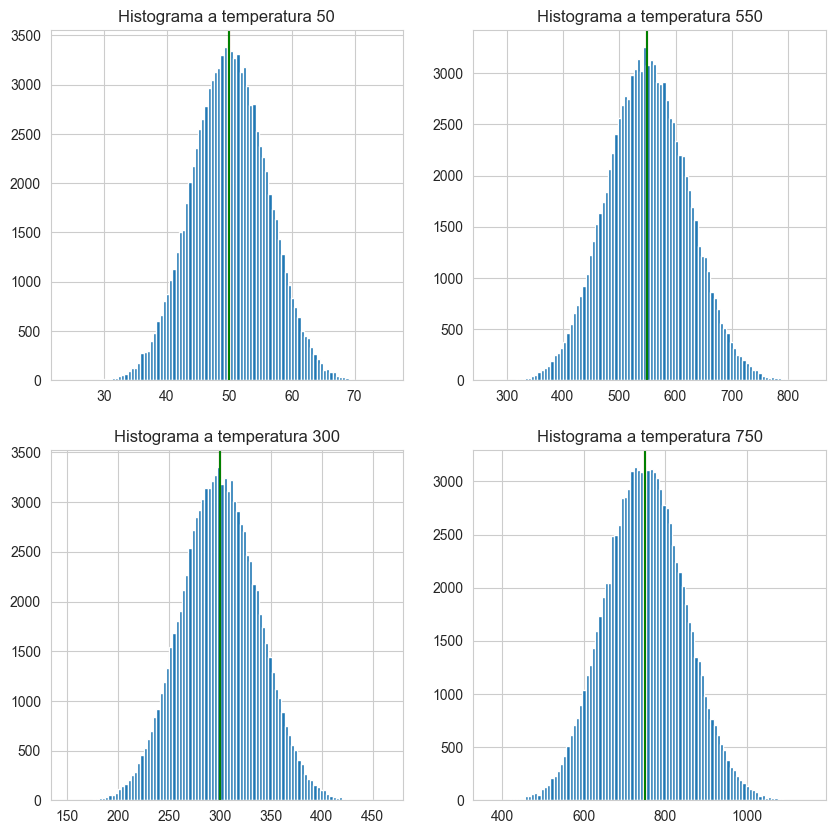

In [5]:
fig, axes = plt.subplots(2,2, figsize=(10,10))
i=0
for n,Temp in enumerate(Temperaturas):
    if n == 2:
        i=1
    datos[Temp][0]['T'].hist(bins=100, ax=axes[n%2,i], label='temperatura')
    axes[n%2,i].axvline(x=int(Temp), color = 'red')
    axes[n%2,i].axvline(x=datos[Temp][0]['T'].mean(), color = 'green')
    axes[n%2,i].set_title('Histograma a temperatura {}'.format(Temp))

In [6]:
paleta = {
    'Facet'  : '#93B868',
    'Ridge'  : '#DDE392',
    'Valley' : '#74795B'
    }

### VARIACION XYZ

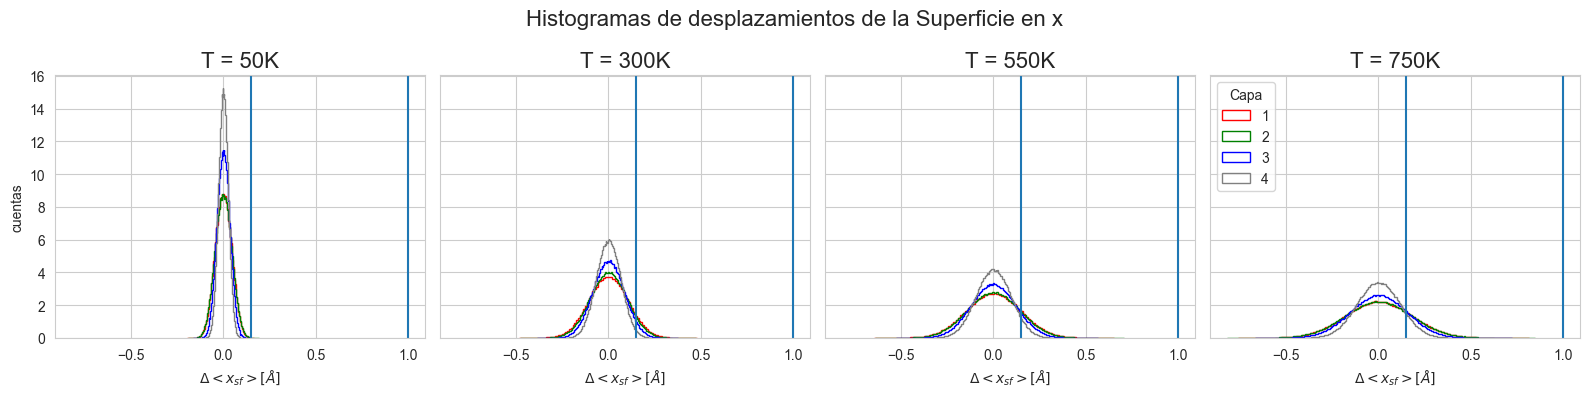

In [16]:
fig, axes = plt.subplots(1,4, figsize=(16,4), sharex=True, sharey=True)
i=0
for n,Temp in enumerate(Temperaturas):
    if n == 2:
        i=1
    datos[Temp][1].query('layer==1')['dx'].hist(bins=100, ax=axes[n], label = '1'  ,density=1, edgecolor='red',  histtype='step')
    datos[Temp][1].query('layer==2')['dx'].hist(bins=200, ax=axes[n], label = '2'  ,density=1, edgecolor='green' ,  histtype='step')
    datos[Temp][1].query('layer==3')['dx'].hist(bins=200, ax=axes[n], label = '3'  ,density=1, edgecolor='blue'  ,  histtype='step')
    datos[Temp][1].query('layer==4')['dx'].hist(bins=200, ax=axes[n], label = '4'  ,density=1, edgecolor='gray',  histtype='step')
    axes[n].set_title('T = {}K'.format(Temp), fontsize=16)
    axes[n].set_xlabel('$\Delta <x_{sf}> [\AA]$')
    axes[n].axvline(x=0.15)
    # axes[n].axvline(x=0.3)
    # axes[n].axvline(x=0.4)
    axes[n].axvline(x=1)
fig.suptitle('Histogramas de desplazamientos de la Superficie en x', fontsize=16)
axes[0].set_ylabel('cuentas')
axes[3].legend(title='Capa')
fig.tight_layout()
plt.show()


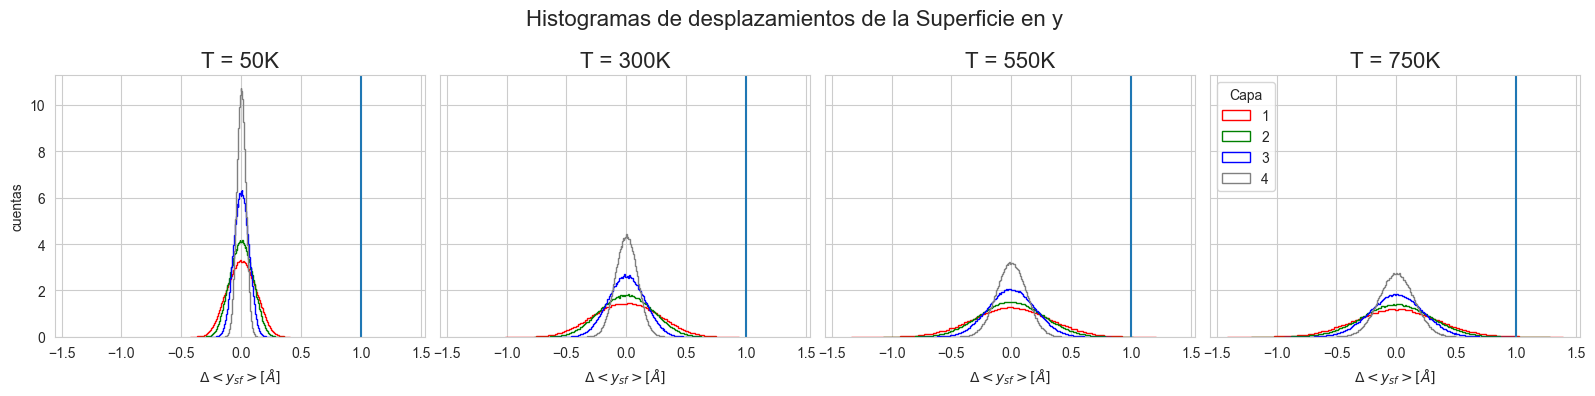

In [15]:
fig, axes = plt.subplots(1,4, figsize=(16,4), sharex=True, sharey=True)
i=0
for n,Temp in enumerate(Temperaturas):
    if n == 2:
        i=1
    datos[Temp][1].query('layer==1')['dy'].hist(bins=100, ax=axes[n], label = '1'  ,density=1, edgecolor='red',  histtype='step')
    datos[Temp][1].query('layer==2')['dy'].hist(bins=200, ax=axes[n], label = '2'  ,density=1, edgecolor='green' ,  histtype='step')
    datos[Temp][1].query('layer==3')['dy'].hist(bins=200, ax=axes[n], label = '3'  ,density=1, edgecolor='blue'  ,  histtype='step')
    datos[Temp][1].query('layer==4')['dy'].hist(bins=200, ax=axes[n], label = '4'  ,density=1, edgecolor='gray',  histtype='step')
    axes[n].set_title('T = {}K'.format(Temp), fontsize=16)
    axes[n].set_xlabel('$\Delta <y_{sf}> [\AA]$')
    # axes[n].axvline(x=0.15)
    # axes[n].axvline(x=0.3)
    # axes[n].axvline(x=0.4)
    axes[n].axvline(x=1)
fig.suptitle('Histogramas de desplazamientos de la Superficie en y', fontsize=16)
axes[0].set_ylabel('cuentas')
axes[3].legend(title='Capa')
fig.tight_layout()
plt.show()


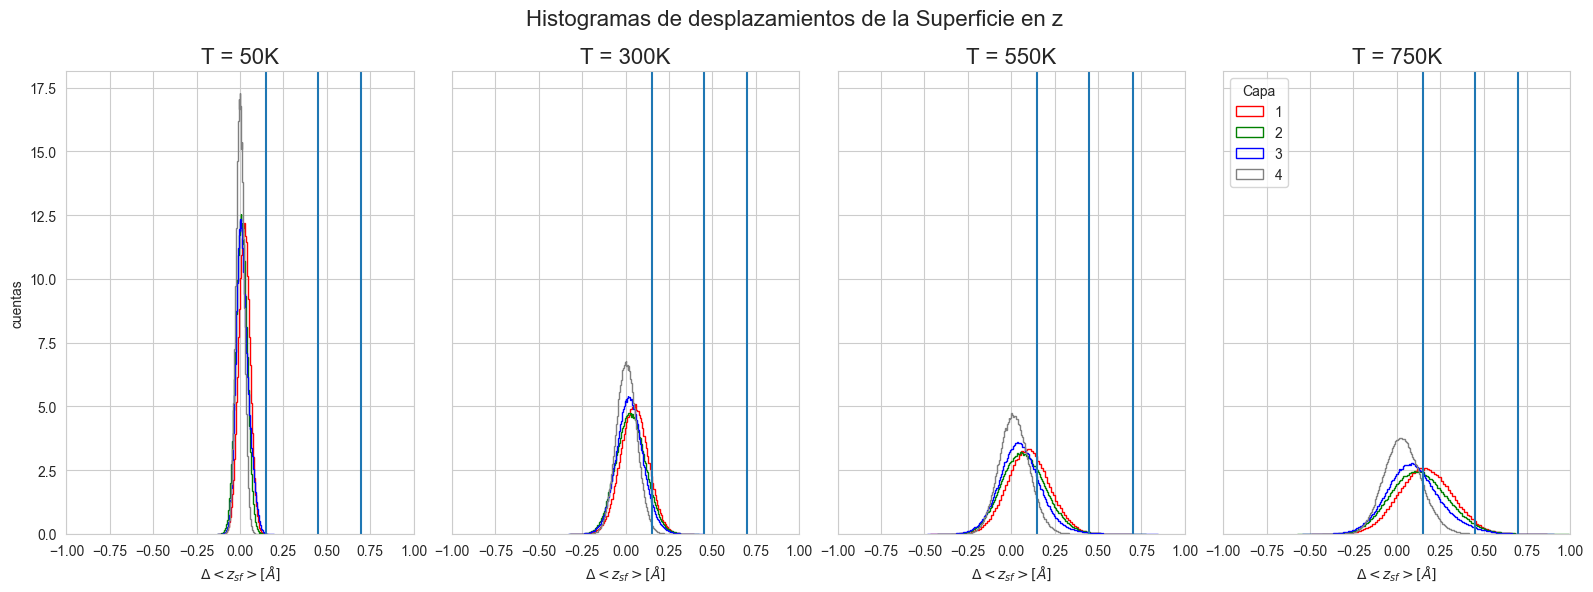

In [22]:
fig, axes = plt.subplots(1,4, figsize=(16,6), sharex=True, sharey=True)
i=0
for n,Temp in enumerate(Temperaturas):
    if n == 2:
        i=1
    datos[Temp][1].query('layer==1')['dz'].hist(bins=100, ax=axes[n], label = '1'  ,density=1, edgecolor='red',  histtype='step')
    datos[Temp][1].query('layer==2')['dz'].hist(bins=200, ax=axes[n], label = '2'  ,density=1, edgecolor='green' ,  histtype='step')
    datos[Temp][1].query('layer==3')['dz'].hist(bins=200, ax=axes[n], label = '3'  ,density=1, edgecolor='blue'  ,  histtype='step')
    datos[Temp][1].query('layer==4')['dz'].hist(bins=200, ax=axes[n], label = '4'  ,density=1, edgecolor='gray',  histtype='step')
    axes[n].set_title('T = {}K'.format(Temp), fontsize=16)
    axes[n].set_xlabel('$\Delta <z_{sf}> [\AA]$')
    axes[n].axvline(x=0.15)
    # axes[n].axvline(x=0.1)
    # axes[n].axvline(x=0.3)
    axes[n].axvline(x=0.45)
    axes[n].axvline(x=0.7)
fig.suptitle('Histogramas de desplazamientos de la Superficie en z', fontsize=16)

axes[0].set_xlim(-1,1)
axes[0].set_ylabel('cuentas')
axes[3].legend(title='Capa')
fig.tight_layout()
plt.show()
